In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [6]:
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/Diabetes_prediction.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [7]:
data = pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [8]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [10]:
data.diabetes.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [11]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<Axes: xlabel='diabetes', ylabel='count'>

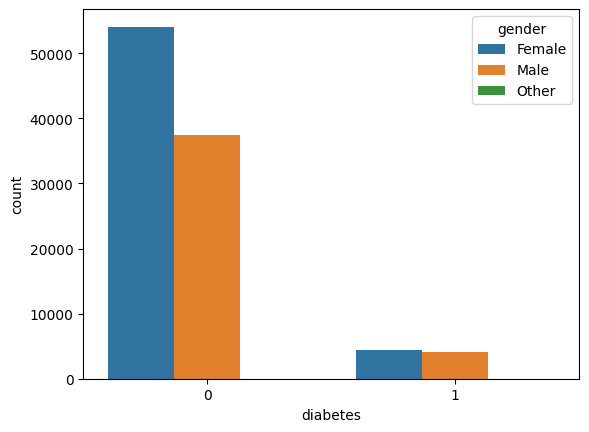

In [12]:
sns.countplot(x = data["diabetes"], hue=data["gender"])

<Axes: xlabel='age', ylabel='bmi'>

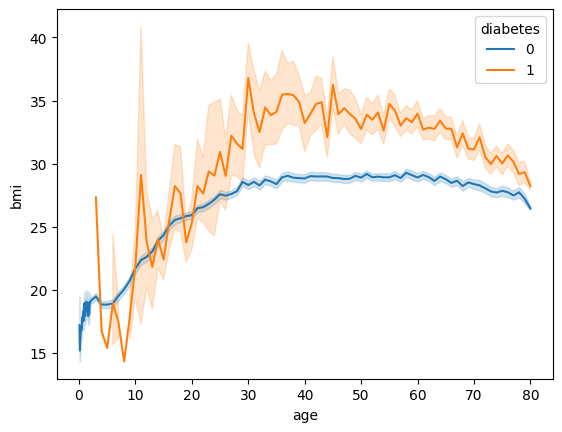

In [13]:
sns.lineplot(data, x= data['age'], y=data['bmi'], hue = data['diabetes'])

In [14]:
data.corr()

<ipython-input-14-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [15]:
X = data.drop(['diabetes'],axis=1)
y = data['diabetes']

In [16]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [17]:
data["diabetes"].unique()

array([0, 1])

In [18]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

def process_columns(df):
    # Separate numerical and categorical columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    # Apply MinMaxScaler to numerical columns
    scaler = MinMaxScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

    # Apply OneHotEncoder to categorical columns
    encoder = OneHotEncoder(sparse=False)
    encoded_categorical_data = encoder.fit_transform(df[categorical_columns])
    encoded_categorical_columns = encoder.get_feature_names_out(categorical_columns)
    encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoded_categorical_columns)

    # Drop the original categorical columns and add the encoded ones
    df = df.drop(columns=categorical_columns)
    df = pd.concat([df, encoded_categorical_df], axis=1)

    return df, numerical_columns, categorical_columns

# Example usage:
# df = pd.read_csv("your_dataset.csv")
# processed_df, numerical_columns, categorical_columns = process_columns(df)


In [21]:
processed_df, numerical_columns, categorical_columns = process_columns(data)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
numerical_columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [23]:
categorical_columns

Index(['gender', 'smoking_history'], dtype='object')

In [24]:
numerical_columns = numerical_columns.tolist()
numerical_columns.remove("diabetes")

ct = make_column_transformer(
    (MinMaxScaler(), numerical_columns), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), categorical_columns)
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [25]:
X_train_normal[:2]

array([[0.91241241, 0.        , 0.        , 0.18041804, 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.17834006, 0.4       ,
        0.29545455, 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ]])

In [26]:
y_train[:5]

75220    0
48955    1
44966    0
13568    0
92727    0
Name: diabetes, dtype: int64

In [27]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(56, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

model_history = model.fit(X_train_normal,
                                y_train,
                                epochs=50,
                                validation_data=(X_test_normal, y_test))

Epoch 1/50
2500/2500 [==============================] - 22s 5ms/step - loss: 0.1251 - accuracy: 0.9567 - val_loss: 0.1102 - val_accuracy: 0.9609
Epoch 2/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.1059 - accuracy: 0.9634 - val_loss: 0.0976 - val_accuracy: 0.9675
Epoch 3/50
2500/2500 [==============================] - 11s 4ms/step - loss: 0.0978 - accuracy: 0.9654 - val_loss: 0.1048 - val_accuracy: 0.9612
Epoch 4/50
2500/2500 [==============================] - 12s 5ms/step - loss: 0.0950 - accuracy: 0.9663 - val_loss: 0.0964 - val_accuracy: 0.9656
Epoch 5/50
2500/2500 [==============================] - 11s 4ms/step - loss: 0.0928 - accuracy: 0.9674 - val_loss: 0.0863 - val_accuracy: 0.9703
Epoch 6/50
2500/2500 [==============================] - 11s 4ms/step - loss: 0.0914 - accuracy: 0.9680 - val_loss: 0.0937 - val_accuracy: 0.9661
Epoch 7/50
2500/2500 [==============================] - 11s 4ms/step - loss: 0.0916 - accuracy: 0.9678 - val_loss: 0.0899 - val_ac

<Axes: xlabel='epochs'>

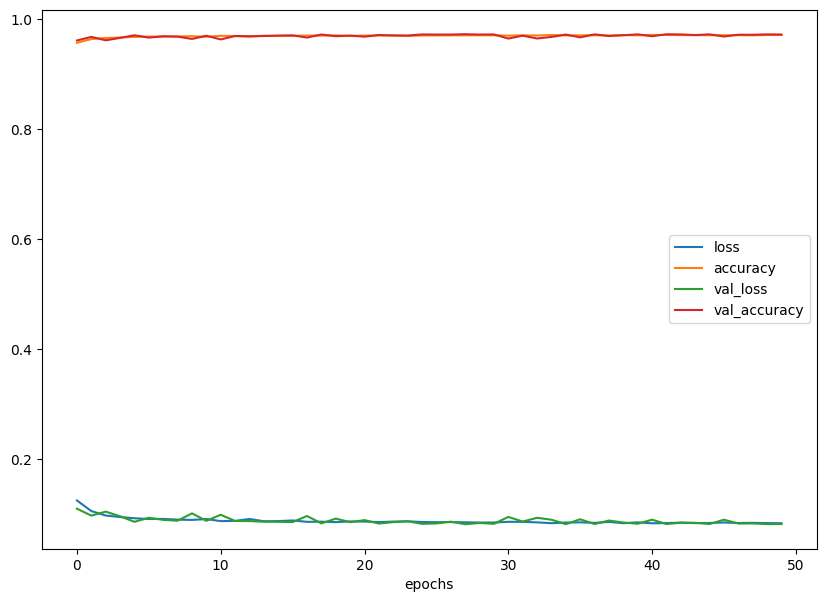

In [28]:
pd.DataFrame(model_history.history).plot(figsize=(10,7), xlabel="epochs")

In [29]:
model.evaluate(X_test_normal,y_test)

625/625 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9717


[0.0822422206401825, 0.9716500043869019]

In [30]:
y_pred = model.predict(X_test_normal)
y_pred[:5]

625/625 [==============================] - 2s 2ms/step


array([[0.00038375],
       [0.        ],
       [0.        ],
       [0.000222  ],
       [0.10302691]], dtype=float32)